# MPOW Data Reduction

Loading data from excel (derived from charts), and transforming it to relational form

## Imports

In [1]:
import numpy
import os
import pandas
import xlrd
import sys

## Excel parsing

The functions below parse data from Excel sheets (xls format). The data are arranged such that each row represents the time-ordered observations for a particular patient. 

In the pain score data, the color green represents the beginning of a day, and the color red represents the recording of a "null" day.

In [2]:
def cell_fmt(cell, wb):
    return wb.xf_list[cell.xf_index]

In [3]:
def cell_bg_color(cell: xlrd.sheet.Cell, wb: xlrd.Book) -> int:
    '''
    Return the background color index of a given cell
    
    Args:
        cell:
            Cell, the cell to extract background information from
    '''
    
    return cell_fmt(cell, wb).background.pattern_colour_index

In [50]:
path

'/Users/jim/repos/collab/collab-mpow/data/retrospective.h5'

In [58]:
data.head()

,Patient,Ordinal,PainScore,DayStart,DayNum,Intake,AgeAtAdmit,Gender,ImpairmentGroup,Depression
0,1,1.0,9.0,1.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
1,1,2.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
2,1,3.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
3,1,4.0,8.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
4,1,5.0,0.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0


In [66]:
hdf = pandas.HDFStore(path)

In [2]:
wb = xlrd.open_workbook('/Users/jim/repos/collab/collab-mpow/data/retro_omeq_intake.xls', formatting_info=True)

In [3]:
def cell_is_day_start(cell, wb):
    return cell_bg_color(cell, wb) == 31

In [8]:
def load_sheet_cells(path: str, sheet_name: str, cell_extractor, columns: list, num_rows: int=0, num_cols: int=0, start: tuple=(0,0)):
    wb = xlrd.open_workbook(path, formatting_info=True)
    sheet = wb.sheet_by_name(sheet_name)
    data = []
    for row in range(start[0], start[0] + num_rows, 1):
        for col in range(start[1], start[1] + num_cols, 1):
            print(row, col)
            cell = sheet.cell(row, col) 
            cell_data = cell_extractor(row, col, cell, wb)
            if cell_data is not None:
                data.append(cell_data)
    return pandas.DataFrame(data, columns=columns)

In [5]:
def pain_score_extractor(row, col, cell, wb):
    if not cell.value == '':
        return (row, col-4, cell.value, int(cell_is_day_start(cell, wb)))
    elif cell_bg_color(cell, wb) == 10: # significant day marker with no data
        return (row, col-4, numpy.nan, 1)

In [6]:
def intake_extractor(row, col, cell, wb):
    if not cell.value == '':
        return (row, col-4, cell.value)

In [ ]:
'RETROSPECTIVE Pain Scores' 'RETROSPECTIVE OMeq Intake'

In [17]:
import itertools

In [20]:
list(itertools.product(range(1, 1 + 4, 1), range(5, 5 + 3, 1)))

[(1, 5),
 (1, 6),
 (1, 7),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 5),
 (4, 6),
 (4, 7)]

In [11]:
pain_scores = load_sheet_cells(path='/Users/jim/repos/collab/collab-mpow/data/retro_pain_scores.xls', 
                               sheet_name='RETROSPECTIVE Pain Scores',
                               cell_extractor=pain_score_extractor,
                               columns=['Patient', 'Ordinal', 'PainScore', 'DayStart'],
                               num_rows=155, num_cols=202, start=(1,5))
pain_scores['DayNum'] = pain_scores[['Patient', 'DayStart']].groupby('Patient').cumsum()

In [10]:
intake = load_sheet_cells(path='/Users/jim/Downloads/retro_omeq_intake.xls', 
                          sheet_name='RETROSPECTIVE OMeq Intake',
                          cell_extractor=intake_extractor,
                          columns=['Patient', 'DayNum', 'Intake'],
                          num_rows=154, num_cols=28, start=(1,5))

1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
5 32
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
7 32
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16


88 14
88 15
88 16
88 17
88 18
88 19
88 20
88 21
88 22
88 23
88 24
88 25
88 26
88 27
88 28
88 29
88 30
88 31
88 32
89 5
89 6
89 7
89 8
89 9
89 10
89 11
89 12
89 13
89 14
89 15
89 16
89 17
89 18
89 19
89 20
89 21
89 22
89 23
89 24
89 25
89 26
89 27
89 28
89 29
89 30
89 31
89 32
90 5
90 6
90 7
90 8
90 9
90 10
90 11
90 12
90 13
90 14
90 15
90 16
90 17
90 18
90 19
90 20
90 21
90 22
90 23
90 24
90 25
90 26
90 27
90 28
90 29
90 30
90 31
90 32
91 5
91 6
91 7
91 8
91 9
91 10
91 11
91 12
91 13
91 14
91 15
91 16
91 17
91 18
91 19
91 20
91 21
91 22
91 23
91 24
91 25
91 26
91 27
91 28
91 29
91 30
91 31
91 32
92 5
92 6
92 7
92 8
92 9
92 10
92 11
92 12
92 13
92 14
92 15
92 16
92 17
92 18
92 19
92 20
92 21
92 22
92 23
92 24
92 25
92 26
92 27
92 28
92 29
92 30
92 31
92 32
93 5
93 6
93 7
93 8
93 9
93 10
93 11
93 12
93 13
93 14
93 15
93 16
93 17
93 18
93 19
93 20
93 21
93 22
93 23
93 24
93 25
93 26
93 27
93 28
93 29
93 30
93 31
93 32
94 5
94 6
94 7
94 8
94 9
94 10
94 11
94 12
94 13
94 14
94 15
94 16
94 1

145 8
145 9
145 10
145 11
145 12
145 13
145 14
145 15
145 16
145 17
145 18
145 19
145 20
145 21
145 22
145 23
145 24
145 25
145 26
145 27
145 28
145 29
145 30
145 31
145 32
146 5
146 6
146 7
146 8
146 9
146 10
146 11
146 12
146 13
146 14
146 15
146 16
146 17
146 18
146 19
146 20
146 21
146 22
146 23
146 24
146 25
146 26
146 27
146 28
146 29
146 30
146 31
146 32
147 5
147 6
147 7
147 8
147 9
147 10
147 11
147 12
147 13
147 14
147 15
147 16
147 17
147 18
147 19
147 20
147 21
147 22
147 23
147 24
147 25
147 26
147 27
147 28
147 29
147 30
147 31
147 32
148 5
148 6
148 7
148 8
148 9
148 10
148 11
148 12
148 13
148 14
148 15
148 16
148 17
148 18
148 19
148 20
148 21
148 22
148 23
148 24
148 25
148 26
148 27
148 28
148 29
148 30
148 31
148 32
149 5
149 6
149 7
149 8
149 9
149 10
149 11
149 12
149 13
149 14
149 15
149 16
149 17
149 18
149 19
149 20
149 21
149 22
149 23
149 24
149 25
149 26
149 27
149 28
149 29
149 30
149 31
149 32
150 5
150 6
150 7
150 8
150 9
150 10
150 11
150 12
150 13
150 1

In [13]:
data = pandas.merge(pain_scores, intake, how='outer', on=['Patient', 'DayNum'])

In [14]:
data.head()

,Patient,Ordinal,PainScore,DayStart,DayNum,Intake
0,1,1.0,9.0,1.0,1,80.0
1,1,2.0,2.0,0.0,1,80.0
2,1,3.0,2.0,0.0,1,80.0
3,1,4.0,8.0,0.0,1,80.0
4,1,5.0,0.0,0.0,1,80.0


## Add patient features

In [18]:
extra_features = pandas.read_excel('/Users/jim/Downloads/patient features.xlsx')

In [20]:
data = data.merge(extra_features.rename(columns={'Subject':'Patient'}))

In [21]:
data.head()

,Patient,Ordinal,PainScore,DayStart,DayNum,Intake,Age at Admit,Gender,Impairment Group,"Depression (1=Y, 0=N)"
0,1,1.0,9.0,1.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
1,1,2.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
2,1,3.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
3,1,4.0,8.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
4,1,5.0,0.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0


In [22]:
import os

In [26]:
path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'retrospective.h5')

In [31]:
data.head()

,Patient,Ordinal,PainScore,DayStart,DayNum,Intake,Age at Admit,Gender,Impairment Group,"Depression (1=Y, 0=N)"
0,1,1.0,9.0,1.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
1,1,2.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
2,1,3.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
3,1,4.0,8.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
4,1,5.0,0.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0


In [33]:
data = data.rename(columns={'Age at Admit':'AgeAtAdmit',
                     'Impairment Group': 'ImpairmentGroup',
                     'Depression (1=Y, 0=N)': 'Depression'})

In [35]:
data.to_hdf(path, 'intraday', mode='w')

## Check Data Quality

### Mismatch between DayNums of PainScores and Intake

In [28]:
day_counts = pandas.merge(pain_scores.groupby('Patient')[['DayNum']].max().rename(columns={'DayNum':'NumPainScoreDays'}),
             intake.groupby('Patient')[['DayNum']].max().rename(columns={'DayNum':'NumIntakeDays'}),
             left_index=True, right_index=True)

In [29]:
day_counts[day_counts.NumIntakeDays!=day_counts.NumPainScoreDays]

,NumPainScoreDays,NumIntakeDays
Patient,,
20,10,9
37,16,17
46,22,23
102,12,13
119,9,10
121,13,14
137,11,10
145,23,22


## Initial Analysis

In [184]:
def ols(data, x, y, add_constant=True):
    X = data[x]
    if add_constant:
        X = sm.add_constant(X)
    y = data[y]
    model = sm.OLS(y, X).fit()
    return model

In [36]:
data.head()

,Patient,Ordinal,PainScore,DayStart,DayNum,Intake,AgeAtAdmit,Gender,ImpairmentGroup,Depression
0,1,1.0,9.0,1.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
1,1,2.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
2,1,3.0,2.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
3,1,4.0,8.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0
4,1,5.0,0.0,0.0,1,80.0,32,Female,Spinal_Cord_Dysfunction,0


In [37]:
agg_funcs = {
    'Intake': lambda x: x.values[0],
    'PainScore': lambda x: x.sum(),
    'Ordinal': lambda x: x.count(),
    'AgeAtAdmit': lambda x: x.values[0],
    'Gender': lambda x: x.values[0],
    'ImpairmentGroup': lambda x: x.values[0],
    'Depression': lambda x: x.values[0],
}

In [38]:
summary = data[['Patient', 'DayNum', 'Ordinal', 'PainScore', 'Intake', 
                'AgeAtAdmit', 'Gender', 'ImpairmentGroup', 'Depression']].groupby(['Patient', 'DayNum']).agg(agg_funcs)
summary = summary.rename(columns={'Intake':'Intake',
                                  'Ordinal':'NumObs'}).reset_index()
summary['MeanPainScore'] = summary['PainScore'] / summary['NumObs']
summary['MeanIntake'] = summary['Intake'] / summary['NumObs']

In [39]:
summary.head()

,Patient,DayNum,Intake,PainScore,NumObs,AgeAtAdmit,Gender,ImpairmentGroup,Depression,MeanPainScore,MeanIntake
0,1,1,80.0,29.0,7.0,32,Female,Spinal_Cord_Dysfunction,0,4.142857,11.428571
1,1,2,60.0,24.0,9.0,32,Female,Spinal_Cord_Dysfunction,0,2.666667,6.666667
2,1,3,70.0,38.0,11.0,32,Female,Spinal_Cord_Dysfunction,0,3.454545,6.363636
3,1,4,40.0,23.0,11.0,32,Female,Spinal_Cord_Dysfunction,0,2.090909,3.636364
4,2,1,75.0,63.0,14.0,56,Female,Spinal_Cord_Dysfunction,1,4.500000,5.357143


In [40]:
summary.to_hdf(path, 'daily')

In [159]:
# mask = summary.Intake.notnull()
mask = (summary.NumObs > 0) & summary.Intake.notnull()

In [194]:
summary.head()

,Patient,DayNum,Intake,PainScore,NumObs,MeanPainScore,MeanIntake
0,1,1,80.0,29.0,7.0,4.142857,11.428571
1,1,2,60.0,24.0,9.0,2.666667,6.666667
2,1,3,70.0,38.0,11.0,3.454545,6.363636
3,1,4,40.0,23.0,11.0,2.090909,3.636364
4,1,5,60.0,0.0,0.0,NaN,inf


In [189]:
model = ols(summary[mask], ['PainScore'], 'Intake')

In [190]:
model.params

const        10.009553
PainScore     1.012993
dtype: float64

### Simple one-sample OLS

In [193]:
ols(summary[mask], ['PainScore'], 'Intake').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Intake   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     374.8
Date:                Wed, 08 Nov 2017   Prob (F-statistic):           9.68e-71
Time:                        23:47:15   Log-Likelihood:                -4569.9
No. Observations:                 961   AIC:                             9144.
Df Residuals:                     959   BIC:                             9154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0096      1.342      7.458      0.000       7.376      12.643
PainScore      1.0130      0.052     19.360      0.000       0.910       1.116
==============================================================================
Omnibus:                      434.958   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3239.698
Skew:                           1.915   Prob(JB):                         0.00
Kurtosis:                      11.139   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
summary

,Patient,DayNum,Intake,PainScore,NumObs,MeanPainScore,MeanIntake
0,1,1,80.0,29.0,7.0,4.142857,11.428571
1,1,2,60.0,24.0,9.0,2.666667,6.666667
2,1,3,70.0,38.0,11.0,3.454545,6.363636
3,1,4,40.0,23.0,11.0,2.090909,3.636364
4,1,5,60.0,0.0,0.0,NaN,inf
5,2,1,75.0,63.0,14.0,4.500000,5.357143
6,2,2,70.0,45.0,11.0,4.090909,6.363636
7,2,3,70.0,34.0,12.0,2.833333,5.833333
8,2,4,80.0,62.0,16.0,3.875000,5.000000
9,2,5,70.0,41.0,15.0,2.733333,4.666667


### Looking at Feature Distributions

In [200]:
summary.head()

,Patient,DayNum,Intake,PainScore,NumObs,MeanPainScore,MeanIntake
0,1,1,80.0,29.0,7.0,4.142857,11.428571
1,1,2,60.0,24.0,9.0,2.666667,6.666667
2,1,3,70.0,38.0,11.0,3.454545,6.363636
3,1,4,40.0,23.0,11.0,2.090909,3.636364
4,1,5,60.0,0.0,0.0,NaN,inf


In [237]:
def patient_reg(data, field):
    return ols(data[data.Intake.notnull()], ['DayNum'], field).params['DayNum']

In [248]:
patient_features = pandas.concat([summary.groupby('Patient').apply(lambda x: patient_reg(x, 'Intake')).to_frame('IntakeSlope'),
                                  summary.groupby('Patient').apply(lambda x: patient_reg(x, 'PainScore')).to_frame('PainScoreSlope'),
                                  summary.groupby('Patient')[['DayNum']].count().rename(columns={'DayNum':'NumDays'})], axis=1).reset_index()
patient_features['SlopeDiff'] = patient_features['IntakeSlope'] - patient_features['PainScoreSlope']

In [249]:
patient_features.head()

,Patient,IntakeSlope,PainScoreSlope,NumDays,SlopeDiff
0,1,-6.000000,-5.900000,5,-0.100000
1,2,1.000000,-8.542857,6,9.542857
2,3,-1.011905,-1.476190,8,0.464286
3,4,-0.166667,0.066667,9,-0.233333
4,5,-2.484848,-0.193939,10,-2.290909


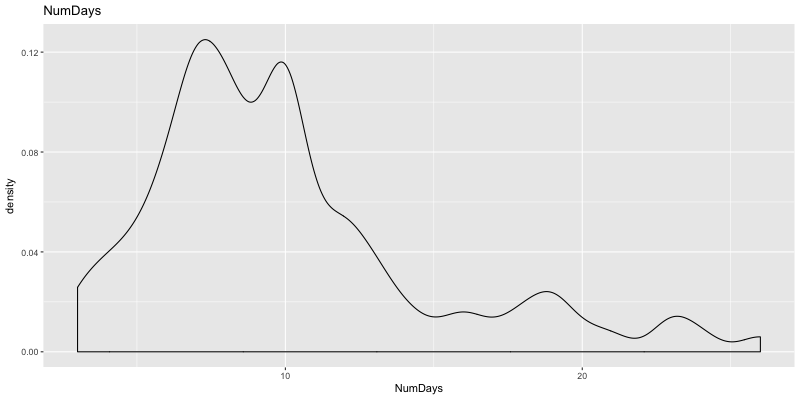

In [245]:
image(gg2.ggplot(patient_features) + gg2.aes_string(x='NumDays') + gg2.geom_density(adjust=1/2) + gg2.ggtitle('NumDays'), height=400)

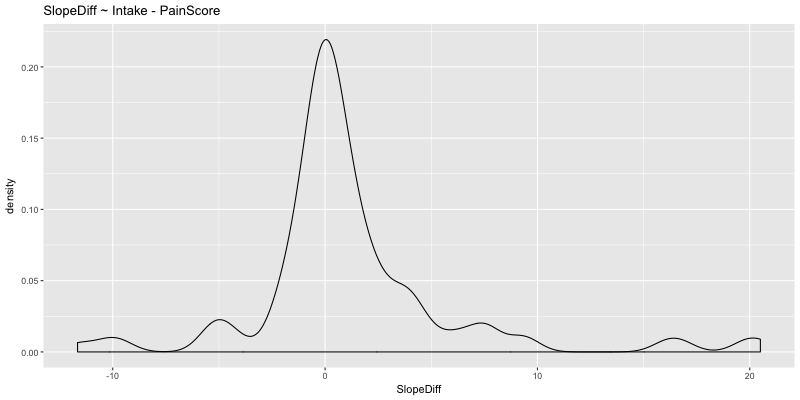

In [252]:
image(gg2.ggplot(patient_features) + gg2.aes_string(x='SlopeDiff') + gg2.geom_density(adjust=1) + gg2.ggtitle('SlopeDiff ~ Intake - PainScore'), height=400)

In [168]:
tmp = summary[mask][['Patient', 'DayNum', 'Intake', 'PainScore']].set_index(['Patient', 'DayNum']).stack()\
                    .to_frame('Value').reset_index().rename(columns={'level_2':'ValueType'})

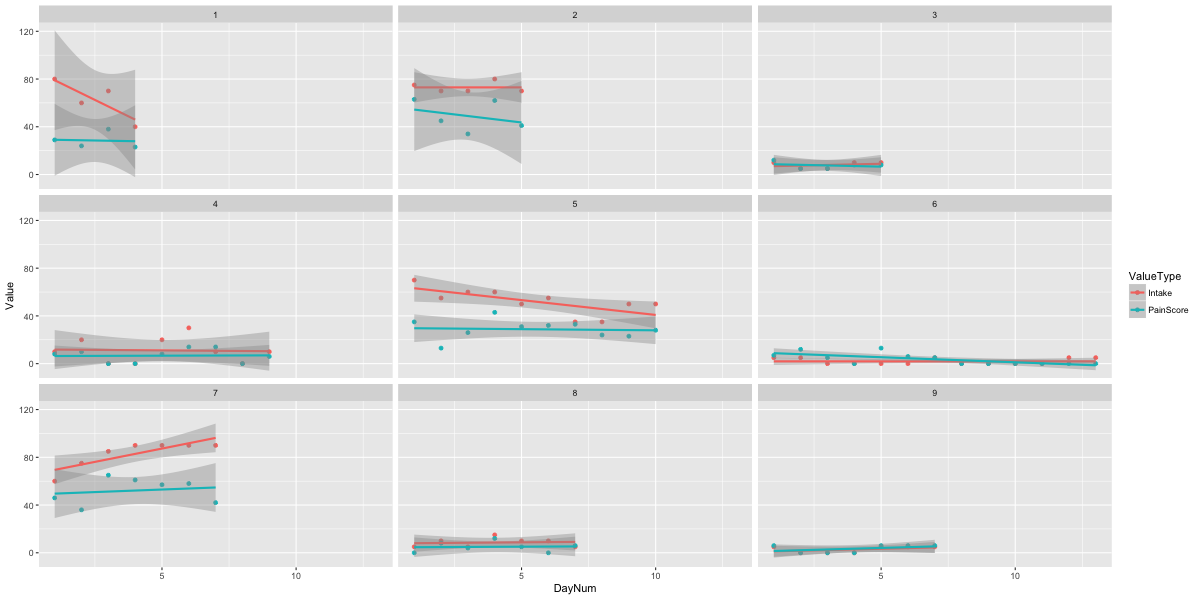

In [180]:
image(gg2.ggplot(tmp[tmp.Patient<10]) + \
      gg2.aes_string(x='DayNum', y='Value', color='ValueType') + \
      gg2.facet_wrap('Patient') + \
      gg2.geom_point()  + \
      gg2.geom_smooth(method='lm') 
      , width=1200)

In [254]:
extra_features = pandas.read_excel('/Users/jim/Downloads/patient features.xlsx')

In [256]:
extra_features.columns = ['Patient', 'Age', 'Gender', 'IG', 'DepBin']

In [260]:
extra_summary = summary.merge(extra_features, 'left', on=['Patient'])

In [263]:
extra_summary['Gender'] = (extra_summary['Gender']=='Female').astype(int)

In [265]:
extra_summary.head()

,Patient,DayNum,Intake,PainScore,NumObs,MeanPainScore,MeanIntake,Age,Gender,IG,DepBin
0,1,1,80.0,29.0,7.0,4.142857,11.428571,32,1,Spinal_Cord_Dysfunction,0
1,1,2,60.0,24.0,9.0,2.666667,6.666667,32,1,Spinal_Cord_Dysfunction,0
2,1,3,70.0,38.0,11.0,3.454545,6.363636,32,1,Spinal_Cord_Dysfunction,0
3,1,4,40.0,23.0,11.0,2.090909,3.636364,32,1,Spinal_Cord_Dysfunction,0
4,1,5,60.0,0.0,0.0,NaN,inf,32,1,Spinal_Cord_Dysfunction,0


In [268]:
ols(extra_summary[mask], ['PainScore', 'Age', 'Gender', 'DepBin'], 'Intake').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Intake   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           2.26e-87
Time:                        08:55:53   Log-Likelihood:                -4522.8
No. Observations:                 961   AIC:                             9056.
Df Residuals:                     956   BIC:                             9080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9854      3.677      1.356      0.175      -2.230      12.201
PainScore      0.9224      0.051     17.995      0.000       0.822       1.023
Age           -0.0048      0.051     -0.094      0.925      -0.105       0.095
Gender         2.5931      1.903      1.363      0.173      -1.142       6.328
DepBin        17.4276      2.018      8.635      0.000      13.467      21.388
==============================================================================
Omnibus:                      360.605   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2446.859
Skew:                           1.554   Prob(JB):                         0.00
Kurtosis:                      10.173   Cond. No.                         297.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [269]:
tmp_extra = extra_summary[mask][['Patient', 'DayNum', 'Intake', 'PainScore', 'Gender', 'DepBin']]

In [271]:
image(gg2.ggplot(tmp_extra) + \
      gg2.aes_string(x='PainScore', y='Intake', color='ValueType') + \
      gg2.facet_grid('Gender ~ DepBin') + \
      gg2.geom_point()  + \
      gg2.geom_smooth(method='lm') 
      , width=1200)

/Users/jim/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in eval(expr, envir, enclos) : object 'ValueType' not found

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in eval(expr, envir, enclos) : object 'ValueType' not found


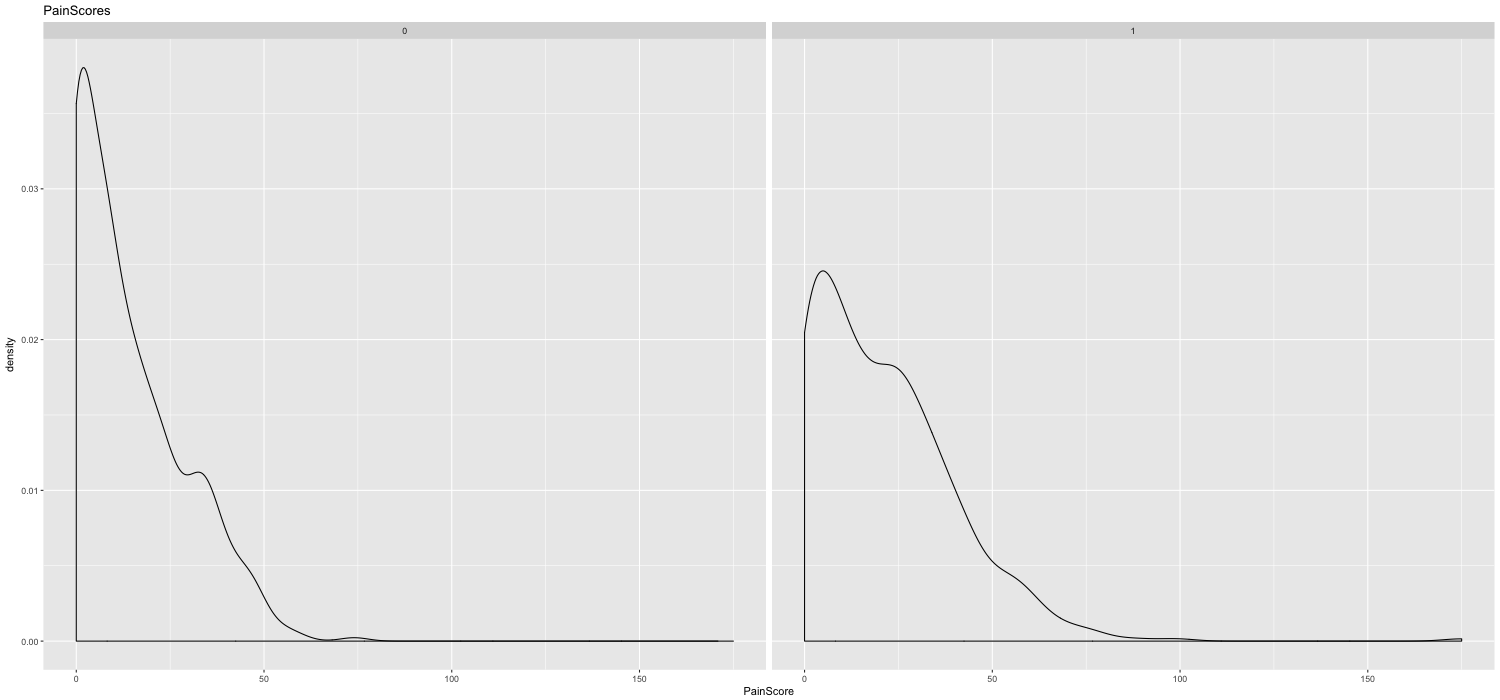

In [288]:
image(gg2.ggplot(extra_summary) + gg2.aes_string(x='PainScore') + 
      gg2.facet_wrap('Gender') +
      gg2.geom_density(alpha=0.7) + gg2.ggtitle('PainScores'), height=700, width=1500)

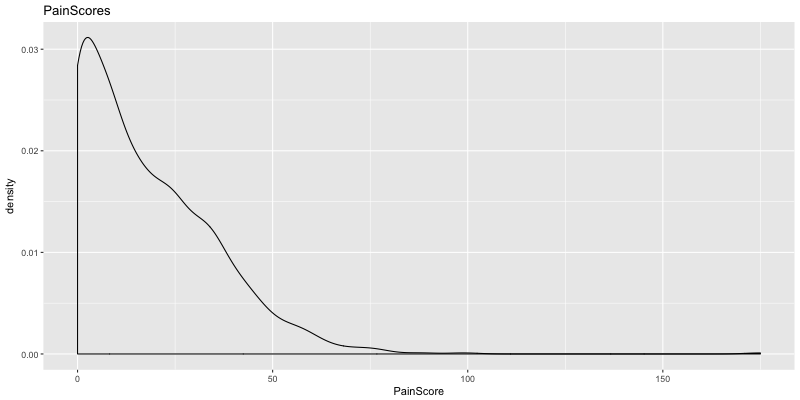

In [284]:
image(gg2.ggplot(extra_summary) + gg2.aes_string(x='PainScore', color='Gender') + 
      gg2.geom_density(alpha=0.7) + gg2.ggtitle('PainScores'), height=400)

In [277]:
extra_summary.head()

,Patient,DayNum,Intake,PainScore,NumObs,MeanPainScore,MeanIntake,Age,Gender,IG,DepBin
0,1,1,80.0,29.0,7.0,4.142857,11.428571,32,1,Spinal_Cord_Dysfunction,0
1,1,2,60.0,24.0,9.0,2.666667,6.666667,32,1,Spinal_Cord_Dysfunction,0
2,1,3,70.0,38.0,11.0,3.454545,6.363636,32,1,Spinal_Cord_Dysfunction,0
3,1,4,40.0,23.0,11.0,2.090909,3.636364,32,1,Spinal_Cord_Dysfunction,0
4,1,5,60.0,0.0,0.0,NaN,inf,32,1,Spinal_Cord_Dysfunction,0


In [290]:
tmp = extra_summary.copy()


In [298]:
tmp['DepGen'] = ((tmp['Gender'] + 2)*(tmp['DepBin']+1)).astype(str)

In [299]:
tmp['DepGen'].value_counts()

2    407
3    274
6    269
4     65
Name: DepGen, dtype: int64

Gender: 2=men, 3=women
 DepBin: 1=not, 2=depressed


In [304]:
mask = tmp.PainScore < 150

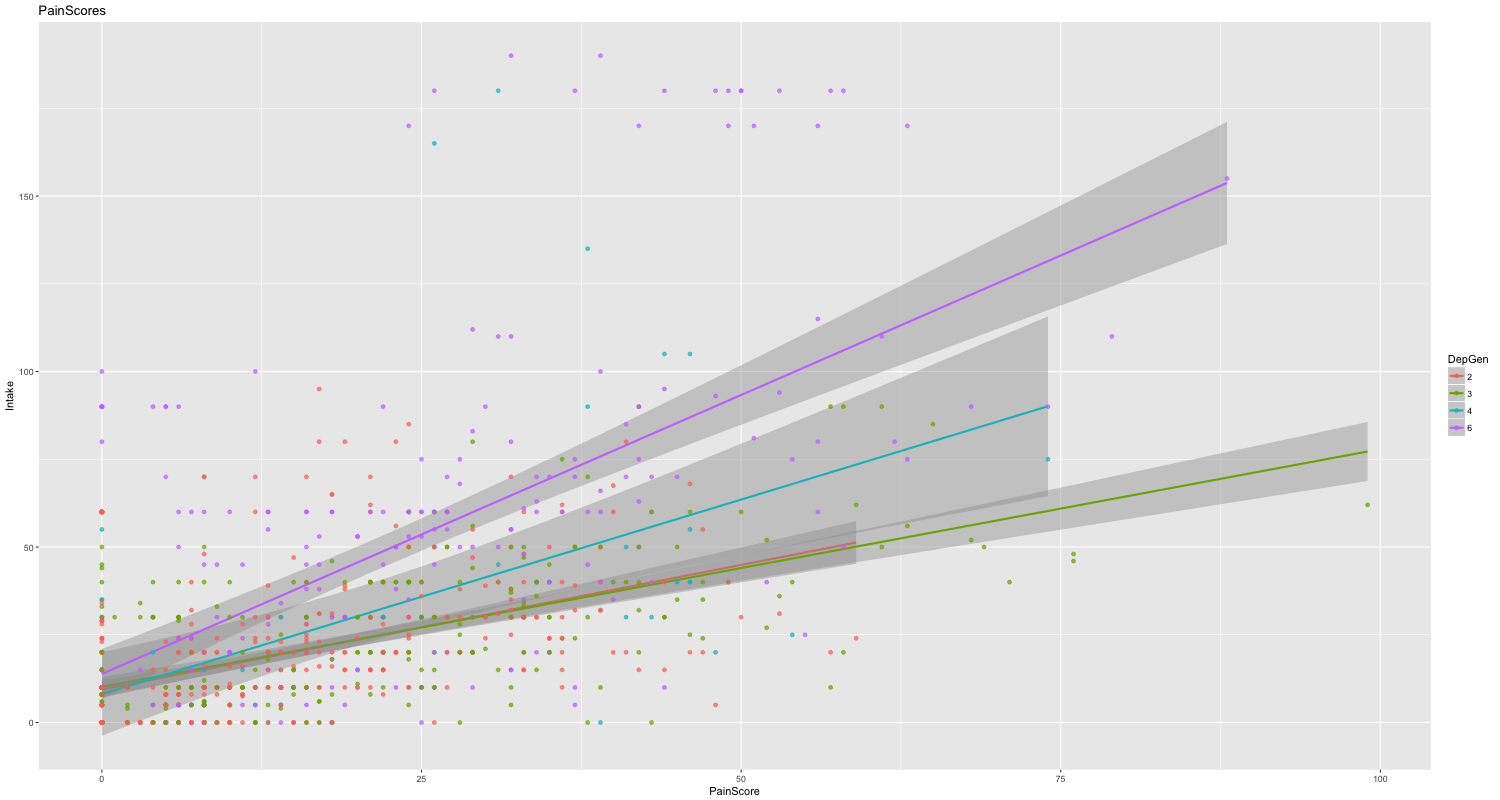

In [305]:
image(gg2.ggplot(tmp[mask][['PainScore', 'Intake', 'DepGen']]) + gg2.aes_string(x='PainScore', y='Intake', color='DepGen') + 
      gg2.geom_smooth(method='lm') +
      gg2.geom_point(alpha=0.7) + gg2.ggtitle('PainScores'), height=800, width=1500)

## Topics

- are men more likely to be proscribed more (interaction with practitioner), "squeaky wheel"
    - survey practitioners with ceteris paribus except gender about treatment


- add interaction for depression gender, chi square, KS, add interaction variable
- female is more likely to seek help for depression
- difference in behavioral expression between genders of depression
- clinical lore
    - men internalize weakness, waiting until it gets out of control
    - 
    
 - differences between reporting difference
 - what about the interaction term?
 - do women get dosed more despite 